# **릿지 회귀(Ridge)**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#boston 데이터 로딩
bostonDF = pd.read_csv('/content/drive/MyDrive/독학/Python ML/data/boston-housing.csv')
bostonDF.rename(columns={'MEDV':'PRICE'}, inplace=True)
bostonDF = bostonDF.iloc[:, 1:]
print('Boston 데이터 크기:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

Boston 데이터 크기: (506, 14)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정해서 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_scores = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE:', np.round(avg_scores, 3))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


In [ ]:
#릿지에 사용할 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

#alphas list의 각 alpha에 따른 평균 rmse를 계산
for alpha in alphas:
    ridge = Ridge(alpha)
    #5 폴드 교차 검증으로 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha}일 때 5 folds의 평균 RMSE: {avg_rmse:.3f}')

alpha 0일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1일 때 5 folds의 평균 RMSE: 5.788
alpha 1일 때 5 folds의 평균 RMSE: 5.653
alpha 10일 때 5 folds의 평균 RMSE: 5.518
alpha 100일 때 5 folds의 평균 RMSE: 5.330


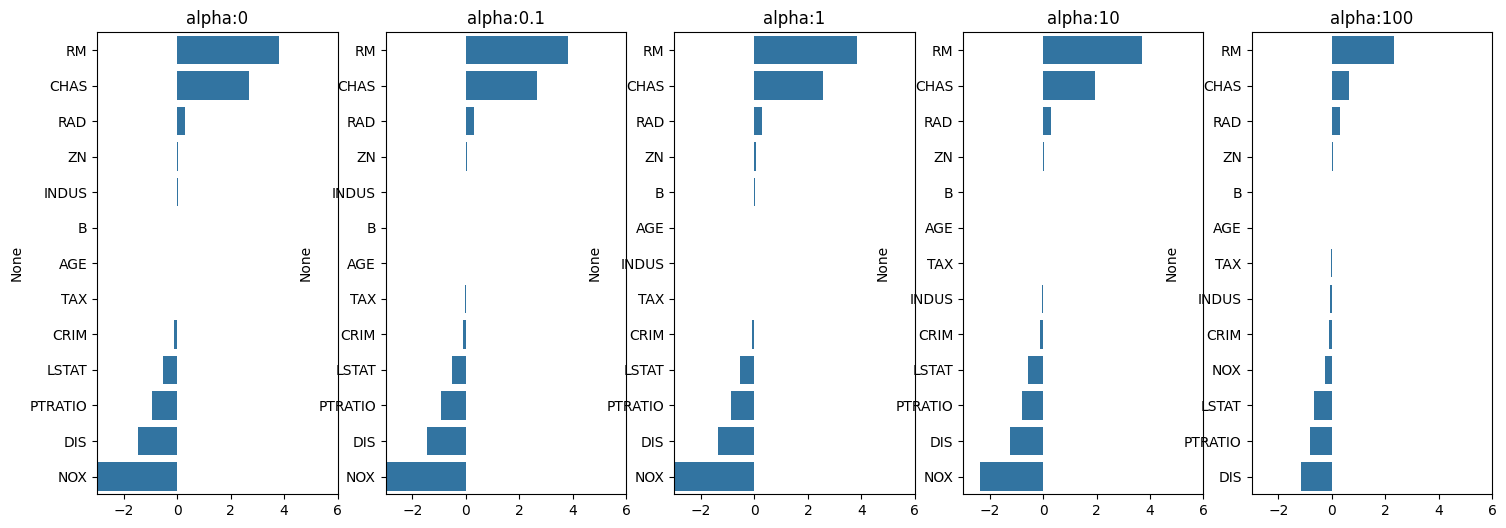

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#각 alpha 값의 변화에 따른 피처의 회귀 계수 값을 시각화
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
#각 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame에 저장
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha)
    ridge.fit(X_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff.sort_values(ascending=False, inplace=True)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100]
coeff_df.sort_values(by=coeff_df.columns[0], ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


# **라쏘 회귀(Lasso)**

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha 값에 따른 회귀 모델의 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params, X_data_n, y_target_n, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(param)
        elif model_name == 'Lasso': model = Lasso(param)
        elif model_name == 'ElasticNet': model = ElasticNet(param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha {param} 일 때 5 폴드 세트의 평균 RMSE: {avg_rmse:.3f}')

        #회귀 계수 추출
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            #alpha에 따른 피처별 회귀 계수를 Series로 변환한 다음 DataFrame 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:' + str(param)
            coeff_df[colname] = coeff

    return coeff_df

In [ ]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', lasso_alphas, X_data, y_target)

####### Lasso #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 6.189


In [ ]:
#alpha 값에 따른 피처별 회귀 계수
coeff_lasso_df.sort_values(by=coeff_lasso_df.columns[0], ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


# **엘라스틱넷 회귀(Elastic Net)**

In [ ]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', elastic_alphas, X_data, y_target)

####### ElasticNet #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 6.068


In [ ]:
#alpha 값에 따른 피처별 회귀 계수
coeff_elastic_df.sort_values(by=coeff_elastic_df.columns[0], ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


# **선형 회귀 모델을 위한 데이터 변환**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method, p_degree, input_data):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [ ]:
#Ridge 회귀의 alpha 값을 변화시키면서 다양한 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(scale_method[0], scale_method[1], X_data)
    print(f'\n## 변환 유형: {scale_method[0]}, Polynomial Degree: {scale_method[1]}')
    get_linear_reg_eval('Ridge', alphas, X_data_scaled, y_target, verbose=False, return_coeff=False)


## 변환 유형: None, Polynomial Degree: None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.518
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형: Standard, Polynomial Degree: None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형: Standard, Polynomial Degree: 2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 8.827
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 6.871
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.485
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 4.634

## 변환 유형: MinMax, Polynomial Degree: None
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 5.298
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 4.323
alpha 10 일 때 5 폴드 세트의 평균 RMSE: 5.185
alpha 100 일 때 5 폴드 세트의 평균 RMSE: 6.538

## 변환 유형: Log, Polynomial Degree: None
alph